In [20]:
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import inspect
import warnings
warnings.filterwarnings("ignore")

In [21]:
pd.options.display.float_format = "{:,.2f}".format
np.set_printoptions(suppress=True)
color_theme = np.array(['darkgray','lightsalmon','powderblue','black','purple','green'])
#plt.ticklabel_format(style='plain');

# Functions Library

In [22]:
def elbow_plot(min_cluster,max_cluster,scaled_data):
    inertia = []
    for n_clusters in range(min_cluster,max_cluster):
        kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=10).fit(scaled_data).inertia_
        #inertia.append(kmeans/n_clusters )
        inertia.append(kmeans)
    inertias = pd.DataFrame({'n_clusters': range(min_cluster,max_cluster), 'inertia': inertia})
    ax = inertias.plot(x = 'n_clusters', y = 'inertia')
    plt.ylabel('Average Within Cluster Sq Distance')
    plt.ticklabel_format(style='plain');
    plt.show();

In [23]:
def histogram_printing(df,column,bins,ylim_list=[0,0],xlim_list=[0,0]): 
    plt.hist(df[column],bins = bins);
    if ylim_list != [0,0]:
        plt.ylim(ylim_list);
    if xlim_list != [0,0]:    
        plt.xlim(xlim_list);
    plt.xlabel(column);
    plt.ticklabel_format(style='plain');
    plt.show();

In [24]:
def transforming_columns(df,col_list):
    df[col_list] = df[col_list].apply(pd.to_numeric)
    for i in col_list:
        df['log_transform_{}'.format(i)] = np.log(df[i])
    return df

In [25]:
def scatter_plot(df,xcolumn,ycolumn):
    plt.scatter(df[xcolumn],df[ycolumn]);
    plt.ylabel(ycolumn);
    plt.xlabel(xcolumn);
    plt.ticklabel_format(style='plain');
    plt.show();

In [26]:
# rewrite this to create new columns with the scaled data
def scale_(df_with_columns):
    x = scale(df_with_columns)
    return x

In [27]:
def clustering(df,cluster_amounts,scaled_data):
    for i in cluster_amounts:
        clustering = KMeans(n_clusters=i, init='k-means++', random_state=10)
        clustering.fit(scaled_data)
        # putting the cluster values into the dataframe raw (i.e. 0,1,2,3)
        df['kmeans_{}'.format(i)] = clustering.labels_
        df['kmeans_{}_color'.format(i)] = color_theme[clustering.labels_]
    return df

In [28]:
def cluster_scatter(df,xcolumn,ycolumn,cluster_value):
    for i in cluster_value:
        f = plt.figure(figsize=(10,7))
        ax = f.add_subplot(221)
        ax2 = f.add_subplot(222)
        #print('Scatter plot on {} clustering\n'.format(i))
        #plt.scatter(x=df[column1],y=df[column2], c=color_theme[df['kmeans_{}'.format(i)]]);
        ax.scatter(x=df[xcolumn],y=df[ycolumn], c=df['kmeans_{}_color'.format(i)]);
        #ax.ylabel(ycolumn);
        ax.set_ylabel(ycolumn);
        ax.set_xlabel(xcolumn);
        #ax.xlabel(xcolumn);
        ax.ticklabel_format(style='plain');
        ax.title.set_text('Scatter plot on {} clustering\n'.format(i));
        #ax.show(); 
        for j in range(0,i):
            ax2.hist(x=df[df['kmeans_{}_color'.format(i)]==color_theme[j]][xcolumn],color = color_theme[j],bins = 200);
            ax2.set_xlabel(xcolumn);
            ax2.title.set_text('Histogram on {} clustering\n'.format(i));
        #ax2.show();

In [29]:
# def histogram_cluster_printing(df,column,bins,cluster_values):
#     # histogram with TVMs on x-axis and user count on y-axis
#     plt.hist(x=df[df['kmeans_5_color']=='purple']['total_tvms'],color = 'purple',bins = 200);
#     plt.hist(x=df[df['kmeans_5_color']=='purple']['total_tvms'],color = 'purple',bins = 200);
#     plt.hist(x=df[df['kmeans_5_color']=='powderblue']['total_tvms'],color = 'powderblue',bins = 200);
#     plt.hist(x=df[df['kmeans_5_color']=='darkgray']['total_tvms'],color = 'darkgray',bins = 200);

In [30]:
def description(df,column,cluster_value):
    print(column)
    temp = df.groupby('kmeans_{}_color'.format(cluster_value))[column].describe()
    temp['User Percent'] = temp['count']/sum(temp['count'])*100
    #return column,'kmeans_{}'.format(cluster_value),temp.sort_values(by=['mean'],ascending=False)
    return temp.sort_values(by=['mean'],ascending=False)

In [31]:
def boxplot(df,column):
    bp = plt.boxplot(df[column])
    whiskers = [whiskers.get_ydata() for whiskers in bp["whiskers"]]
    #plt.ticklabel_format(style='plain');
    print(df[df[column] < whiskers[0][1]][column].count(),' users are below the lower bound value of ' , whiskers[0][1])
    print(df[df[column] > whiskers[1][1]][column].count(),' users are above the upper bound value of ' , whiskers[1][1])

In [32]:
# def export_clusters(fname, *args):
#     frames1 = [item for item in args]
#     with open(fname, mode='a+') as f:
#         for df in frames1:
#             df.to_csv(fname, mode='a', header = f.tell() == 0)
#             f.write('\n')
def export_clusters(fname, column, *args):
    frames1 = [item for item in args]
    with open(fname, mode='a+') as f:
        for df in frames1:
            f.write(column)
            df.to_csv(fname, mode='a', header = f.tell() == 0)
            f.write('\n')

In [33]:
# practice df
df = pd.DataFrame(columns=['aa','b','c','d'], index=['x','y','z','m','n','o','p','h','v','xx','yy','zz','mm','nn','oo','pp','hh','vv'])
df.loc['x'] = pd.Series({'aa':1, 'b':5, 'c':2, 'd':3})
df.loc['y'] = pd.Series({'aa':45, 'b':35, 'c':21, 'd':23})
df.loc['z'] = pd.Series({'aa':10, 'b':59, 'c':22, 'd':544})
df.loc['m'] = pd.Series({'aa':18, 'b':559, 'c':232, 'd':774})
df.loc['n'] = pd.Series({'aa':15, 'b':59, 'c':222, 'd':554})
df.loc['o'] = pd.Series({'aa':12, 'b':5, 'c':2, 'd':546})
df.loc['p'] = pd.Series({'aa':20, 'b':9, 'c':20, 'd':5})
df.loc['h'] = pd.Series({'aa':1, 'b':69, 'c':27, 'd':544})
df.loc['v'] = pd.Series({'aa':20, 'b':529, 'c':72, 'd':34})
df.loc['xx'] = pd.Series({'aa':321, 'b':54, 'c':22, 'd':322})
df.loc['yy'] = pd.Series({'aa':412, 'b':35, 'c':231, 'd':23})
df.loc['zz'] = pd.Series({'aa':1220, 'b':359, 'c':22, 'd':2474})
df.loc['mm'] = pd.Series({'aa':183, 'b':559, 'c':732, 'd':774})
df.loc['nn'] = pd.Series({'aa':125, 'b':529, 'c':2292, 'd':554})
df.loc['oo'] = pd.Series({'aa':122, 'b':5, 'c':22, 'd':546})
df.loc['pp'] = pd.Series({'aa':1330, 'b':93, 'c':20, 'd':5})
df.loc['hh'] = pd.Series({'aa':1422, 'b':69, 'c':427, 'd':544})
df.loc['vv'] = pd.Series({'aa':1200, 'b':329, 'c':72, 'd':4})

In [34]:
scaled_data = scale_(df_with_columns = df[['aa','b']])

In [35]:
#elbow_plot(min_cluster=2,max_cluster=10,scaled_data=scaled_data)

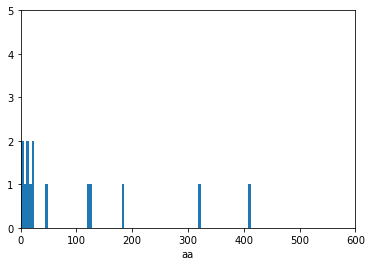

In [36]:
histogram_printing(df,column='aa',bins = 300,ylim_list = [0,5],xlim_list = [0,600])

In [37]:
df = transforming_columns(df,col_list = ['aa','c'])

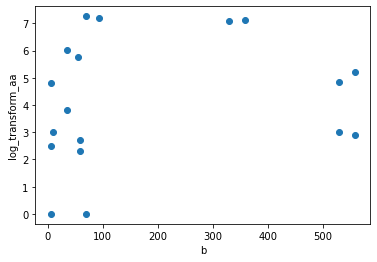

In [38]:
scatter_plot(df,xcolumn = 'b',ycolumn = 'log_transform_aa')

In [39]:
df = clustering(df,cluster_amounts = [3,4,5],scaled_data=scaled_data)

In [40]:
#cluster_scatter(df,xcolumn = 'log_transform_aa',ycolumn = 'b',cluster_value = [3,4,5])

In [41]:
#description(df,column = 'aa',cluster_value = 3)

### SQL 

In [ ]:
# #just one month
# #write and run your query
# cur = con.cursor()
# #cur.execute("SELECT * FROM USER_SEGMENTATIONS ORDER BY CLIENT_ID limit 15")
# cur.execute("""
# select us.client_id
#        ,us.month
#        ,most_Watched_Channel
#        ,most_watched_category
#        ,total_tvms
#        ,user_status
#        ,LINEAR_TVMS
#        ,VOD_TVMS
#        ,ADDTOWATCHLIST_FLAG
#        ,FAVORITECHANNEL_FLAG
#        ,SEARCHSTART_FLAG
#        ,LIVEL2NAV_FLAG
#        ,VODL2NAV_FLAG
#        ,WATCHNOW_FLAG
#        ,BACKTOGUIDE_FLAG
#        ,FEATURE_FLAG
#        ,tenure_days
#        ,avg_days_apart
#        ,avg_session_duration
#        ,monthly_avg_session_duration
#        ,frequency
#        ,monthly_frequency
#        ,unique_days
#        ,day_percent
# from SANDBOX.ANALYSIS_PRODUCT.USER_SEGMENTATIONS_UPDATED us
# JOIN SANDBOX.ANALYSIS_PRODUCT.VIEWERSHIP_PATTERNS vp on vp.client_id = us.client_id
# where 1=1
# and us.MONTH = '2022-04-01'
# and vp.MONTH = '2022-04-01'
#             """)
# #grab the query ID so you can grab the results of the query
# query_id = cur.sfqid

# #pull from core_df instead of repulling from snowflake

## April DataFrame

In [42]:
april_df = pd.read_csv('april_df2.csv', index_col = 0)
april_df.head()

,client_id,month,most_Watched_Channel,most_watched_category,total_tvms,user_status,LINEAR_TVMS,VOD_TVMS,ADDTOWATCHLIST_FLAG,FAVORITECHANNEL_FLAG,...,BACKTOGUIDE_FLAG,FEATURE_FLAG,tenure_days,avg_days_apart,avg_session_duration,monthly_avg_session_duration,frequency,monthly_frequency,unique_days,day_percent
0,942d292c-21ef-5e89-99fa-abd4b90b54aa,2022-04-01,Little Baby Bum,Kids,316.92,Return User,316.92,0.00,0.00,1.00,...,1.00,1.00,521.00,3.50,63.25,21.13,43.00,15.00,9.00,0.30
1,942d2c83-7615-5022-be70-73d0cb84c935,2022-04-01,VOD,VOD,3.00,New User,0.00,3.00,0.00,0.00,...,0.00,0.00,0.00,NaN,3.00,3.00,1.00,1.00,1.00,0.03
2,942d3318-ec21-5a40-81f0-27add2d7bca1,2022-04-01,VOD,VOD,236.40,Return User,25.20,211.20,0.00,0.00,...,0.00,1.00,784.00,NaN,236.40,236.40,1.00,1.00,1.00,0.03
3,942d38e6-62f0-58a5-aa29-fd8fcfb06b48,2022-04-01,The Carol Burnett Show,Classic TV,56.68,Return User,56.68,0.00,0.00,0.00,...,0.00,0.00,581.00,26.00,44.81,56.68,4.00,1.00,1.00,0.03
4,942d3bf3-e07f-54a5-8ef6-183700145fab,2022-04-01,Pluto TV Drama,Movies,260.57,New User,155.98,104.58,0.00,1.00,...,0.00,1.00,4.00,12.67,52.31,65.14,5.00,4.00,3.00,0.10


In [105]:
# # read data from the csv
# april_df = pd.read_csv('april_df2.csv', index_col = False)

# # drop the unnecessary index column
# april_df.drop('Unnamed: 0', axis=1, inplace=True)

In [43]:
print(len(april_df))
print(april_df.dtypes)
april_df.head(2)

5901192
client_id                        object
month                            object
most_Watched_Channel             object
most_watched_category            object
total_tvms                      float64
user_status                      object
LINEAR_TVMS                     float64
VOD_TVMS                        float64
ADDTOWATCHLIST_FLAG             float64
FAVORITECHANNEL_FLAG            float64
SEARCHSTART_FLAG                float64
LIVEL2NAV_FLAG                  float64
VODL2NAV_FLAG                   float64
WATCHNOW_FLAG                   float64
BACKTOGUIDE_FLAG                float64
FEATURE_FLAG                    float64
tenure_days                     float64
avg_days_apart                  float64
avg_session_duration            float64
monthly_avg_session_duration    float64
frequency                       float64
monthly_frequency               float64
unique_days                     float64
day_percent                     float64
dtype: object


,client_id,month,most_Watched_Channel,most_watched_category,total_tvms,user_status,LINEAR_TVMS,VOD_TVMS,ADDTOWATCHLIST_FLAG,FAVORITECHANNEL_FLAG,...,BACKTOGUIDE_FLAG,FEATURE_FLAG,tenure_days,avg_days_apart,avg_session_duration,monthly_avg_session_duration,frequency,monthly_frequency,unique_days,day_percent
0,942d292c-21ef-5e89-99fa-abd4b90b54aa,2022-04-01,Little Baby Bum,Kids,316.92,Return User,316.92,0.00,0.00,1.00,...,1.00,1.00,521.00,3.50,63.25,21.13,43.00,15.00,9.00,0.30
1,942d2c83-7615-5022-be70-73d0cb84c935,2022-04-01,VOD,VOD,3.00,New User,0.00,3.00,0.00,0.00,...,0.00,0.00,0.00,NaN,3.00,3.00,1.00,1.00,1.00,0.03


## TVMs Deep Dive

In [44]:
# doing a deep dive on TVMs on the entire dataframe because all the columns will need to be adjusted for any
    # adjustments to TVMs so I want to remove from the entire dataframe any rows that need to be removed due to TVMs
# We will create individual dataframes later off of the corrected Dataframe for TVMs
april_df.shape

(5901192, 24)

0  users are below the lower bound value of  0.0
872609  users are above the upper bound value of  1640.73334


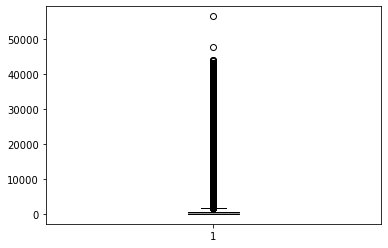

In [48]:
boxplot(april_df,'total_tvms')

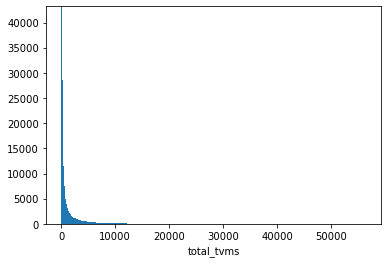

In [153]:
histogram_printing(april_df,column = 'total_tvms',bins = 10000,ylim_list = [0,43200])
#inspect.getargspec(histogram_printing).args

In [46]:
april_df = transforming_columns(april_df,['total_tvms'])

In [49]:
# the transform gave us a warning of dividing by 0 which means we have users with TVM values of 0
# lets see how many we have
april_df[april_df['total_tvms'] == 0]['client_id'].count()

153

In [51]:
# lets check the dimensions of the TVM column
april_df['total_tvms'].describe()

count   5,901,192.00
mean        1,089.57
std         2,969.72
min             0.00
25%            13.32
50%           143.87
75%           664.28
max        56,419.77
Name: total_tvms, dtype: float64

In [157]:
april_df['total_tvms'].max()

56419.76667

In [52]:
# there are only 43,200 TVMs available in the month of April (60 minutes * 24 hours * 30 days = 43,200 TVMs)
# the max TVM value in the Dataframe is 56419.76667 which is technically impossible to have in april
# lets check how many users have a value over 43,200
april_df[april_df['total_tvms'] > 43200]['client_id'].count()

5

In [53]:
# lets remove any users above 43,200 since it should be technically impossible to have that many TVMs 
    # and there are only 5 of theses users
# lets remove any users with a TVM value of 0 sine we get a negative infinity value for those users when we do a log transform 
    # and there are onl 154 users with a 0 TVM value out of the 5.9 million users in the dataframe
april_df1 = april_df[(april_df['total_tvms'] != 0) & (april_df['total_tvms'] < 43200)].copy()

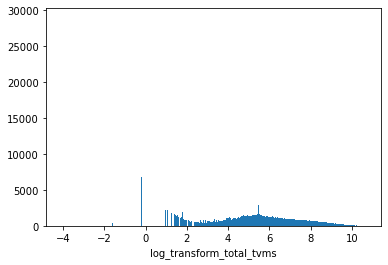

In [19]:
# lets check the transformed TVMs
histogram_printing(april_df1,column='log_transform_total_tvms',bins=10000)

## Creating individual metric dataframes 

In [54]:
tenure_days_df = april_df1[['client_id','tenure_days']]
avg_days_apart_df = april_df1[['client_id','avg_days_apart']]
day_percent_df = april_df1[['client_id','day_percent']]

## Clustering of Session Frequency

In [55]:
april_df1[['client_id','monthly_frequency']].head()

,client_id,monthly_frequency
0,942d292c-21ef-5e89-99fa-abd4b90b54aa,15.00
1,942d2c83-7615-5022-be70-73d0cb84c935,1.00
2,942d3318-ec21-5a40-81f0-27add2d7bca1,1.00
3,942d38e6-62f0-58a5-aa29-fd8fcfb06b48,1.00
4,942d3bf3-e07f-54a5-8ef6-183700145fab,4.00


In [56]:
april_df1.columns

Index(['client_id', 'month', 'most_Watched_Channel', 'most_watched_category',
       'total_tvms', 'user_status', 'LINEAR_TVMS', 'VOD_TVMS',
       'ADDTOWATCHLIST_FLAG', 'FAVORITECHANNEL_FLAG', 'SEARCHSTART_FLAG',
       'LIVEL2NAV_FLAG', 'VODL2NAV_FLAG', 'WATCHNOW_FLAG', 'BACKTOGUIDE_FLAG',
       'FEATURE_FLAG', 'tenure_days', 'avg_days_apart', 'avg_session_duration',
       'monthly_avg_session_duration', 'frequency', 'monthly_frequency',
       'unique_days', 'day_percent', 'log_transform_total_tvms'],
      dtype='object')

In [57]:
monthly_frequency_df = april_df1[['client_id','monthly_frequency','log_transform_total_tvms']]

0  users are below the lower bound value of  1.0
809719  users are above the upper bound value of  16.0


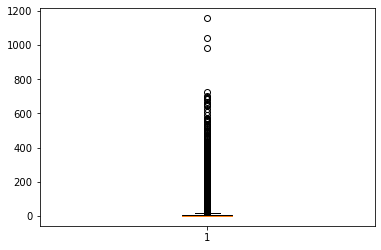

In [58]:
boxplot(monthly_frequency_df,'monthly_frequency')

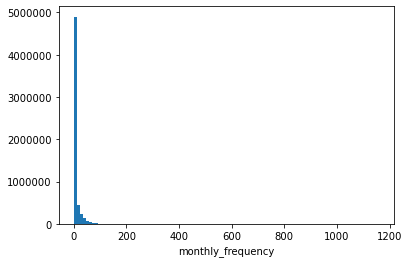

In [115]:
histogram_printing(monthly_frequency_df,'monthly_frequency',100)

In [106]:
pd.DataFrame(monthly_frequency_df['monthly_frequency'].describe())

,monthly_frequency
count,"5,901,034.00"
mean,7.84
std,14.87
min,1.00
25%,1.00
50%,2.00
75%,7.00
max,"1,157.00"


In [61]:
np.percentile(monthly_frequency_df['monthly_frequency'], np.arange(0, 100, 10))

array([ 1.,  1.,  1.,  1.,  1.,  2.,  3.,  5., 10., 23.])

In [62]:
monthly_frequency_df = transforming_columns(monthly_frequency_df,['monthly_frequency'])

In [457]:
monthly_frequency_df.head(1)

,client_id,monthly_frequency,log_transform_monthly_frequency,log_transform_total_tvms,total_tvms,kmeans_3,kmeans_4,kmeans_3_color,kmeans_4_color
0,942d292c-21ef-5e89-99fa-abd4b90b54aa,15.00,2.71,5.76,316.92,0,3,darkgray,black


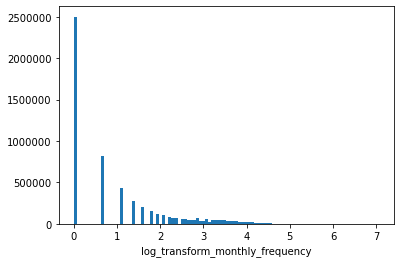

In [118]:
histogram_printing(monthly_frequency_df,'log_transform_monthly_frequency',100)

#### Clustering Monthly Frequency vs TVMs

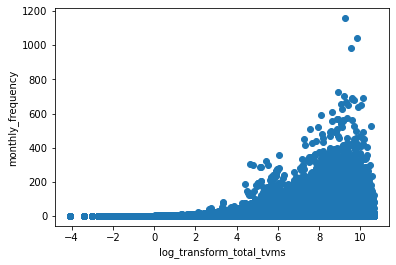

In [63]:
scatter_plot(monthly_frequency_df,'log_transform_total_tvms','monthly_frequency')

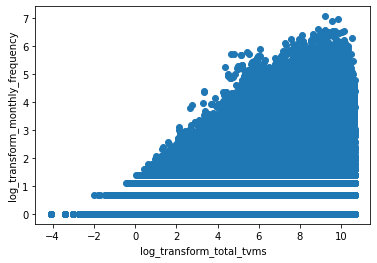

In [64]:
scatter_plot(monthly_frequency_df,'log_transform_total_tvms','log_transform_monthly_frequency')

In [67]:
scaled_data1 = scale_(monthly_frequency_df[['log_transform_total_tvms','monthly_frequency']])

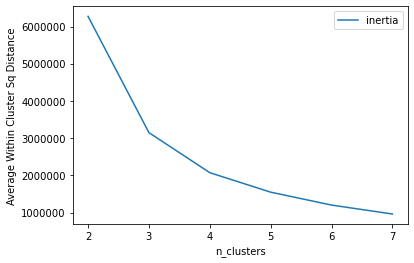

In [69]:
elbow_plot(min_cluster=2,max_cluster=8,scaled_data=scaled_data1)

In [116]:
monthly_frequency_df = clustering(monthly_frequency_df,cluster_amounts = [3,4],scaled_data = scaled_data1)
#clustering(df,cluster_amounts,scaled_data)

In [103]:
# cluster_scatter(monthly_frequency_df,'log_transform_total_tvms','monthly_frequency',[3,4])

In [459]:
#cluster_scatter(monthly_frequency_df,'total_tvms','monthly_frequency',[3,4])

In [120]:
description(monthly_frequency_df,column = 'total_tvms',cluster_value = 3)

total_tvms


KeyError: 'Column not found: total_tvms'

In [462]:
description(monthly_frequency_df,column = 'monthly_frequency',cluster_value = 4)

monthly_frequency


,count,mean,std,min,25%,50%,75%,max,User Percent
kmeans_4_color,,,,,,,,,
powderblue,"216,820.00",65.72,26.59,43.00,50.00,58.00,72.00,"1,157.00",3.67
lightsalmon,"894,088.00",22.28,9.23,1.00,15.00,21.00,29.00,47.00,15.15
black,"3,116,230.00",3.23,2.72,1.00,1.00,2.00,4.00,27.00,52.81
darkgray,"1,673,896.00",1.22,0.61,1.00,1.00,1.00,1.00,24.00,28.37


In [175]:
desc_4_tvm = monthly_frequency_df.groupby('kmeans_4_color')['log_transform_total_tvms'].describe()
desc_4_tvm['index'] = desc_4_tvm["mean"]/monthly_frequency_df['log_transform_total_tvms'].mean()
desc_4_tvm['user%'] = desc_4_tvm['count']/desc_4_tvm['count'].sum()
desc_4_tvm.sort_values('user%')

,count,mean,std,min,25%,50%,75%,max,index,user%
kmeans_4_color,,,,,,,,,,
powderblue,"216,820.00",8.94,0.80,2.75,8.46,9.04,9.52,10.67,1.97,0.04
lightsalmon,"894,088.00",7.84,0.84,2.68,7.29,7.82,8.38,10.67,1.73,0.15
darkgray,"1,673,896.00",0.94,1.24,-4.09,-0.05,1.01,1.97,3.10,0.21,0.28
black,"3,116,230.00",5.22,1.07,2.85,4.43,5.28,6.01,9.39,1.15,0.53


In [177]:
desc_4_freq = monthly_frequency_df.groupby('kmeans_4_color')['monthly_frequency'].describe()
desc_4_freq['index'] = desc_4_freq["mean"]/monthly_frequency_df['monthly_frequency'].mean()
desc_4_freq['user%'] = desc_4_freq['count']/desc_4_freq['count'].sum()
desc_4_freq.sort_values('user%')

,count,mean,std,min,25%,50%,75%,max,index,user%
kmeans_4_color,,,,,,,,,,
powderblue,"216,820.00",65.72,26.59,43.00,50.00,58.00,72.00,"1,157.00",8.38,0.04
lightsalmon,"894,088.00",22.28,9.23,1.00,15.00,21.00,29.00,47.00,2.84,0.15
darkgray,"1,673,896.00",1.22,0.61,1.00,1.00,1.00,1.00,24.00,0.16,0.28
black,"3,116,230.00",3.23,2.72,1.00,1.00,2.00,4.00,27.00,0.41,0.53


In [176]:
monthly_frequency_df.columns

Index(['client_id', 'monthly_frequency', 'log_transform_total_tvms',
       'log_transform_monthly_frequency', 'kmeans_3', 'kmeans_3_color',
       'kmeans_4', 'kmeans_4_color'],
      dtype='object')

In [174]:
temp2 = monthly_frequency_df.groupby('kmeans_4_color')['monthly_frequency'].describe()

,count,mean,std,min,25%,50%,75%,max
kmeans_4_color,,,,,,,,
black,"3,116,230.00",3.23,2.72,1.00,1.00,2.00,4.00,27.00
darkgray,"1,673,896.00",1.22,0.61,1.00,1.00,1.00,1.00,24.00
lightsalmon,"894,088.00",22.28,9.23,1.00,15.00,21.00,29.00,47.00
powderblue,"216,820.00",65.72,26.59,43.00,50.00,58.00,72.00,"1,157.00"


In [173]:
monthly_frequency_df.columns

Index(['client_id', 'monthly_frequency', 'log_transform_total_tvms',
       'log_transform_monthly_frequency', 'kmeans_3', 'kmeans_3_color',
       'kmeans_4', 'kmeans_4_color'],
      dtype='object')

In [463]:
description(monthly_frequency_df,column = 'total_tvms',cluster_value = 4)

total_tvms


,count,mean,std,min,25%,50%,75%,max,User Percent
kmeans_4_color,,,,,,,,,
powderblue,"216,820.00","9,940.01","6,835.09",15.60,"4,709.44","8,437.90","13,600.82","42,940.43",3.67
lightsalmon,"894,088.00","3,662.28","4,063.08",14.53,"1,471.72","2,486.05","4,379.62","43,171.23",15.15
black,"3,116,230.00",318.18,366.57,17.32,83.57,195.78,406.28,"11,949.53",52.81
darkgray,"1,673,896.00",5.02,5.57,0.02,0.95,2.73,7.17,22.17,28.37


## Clustering on unique days

In [179]:
unique_days_df = april_df1[['client_id','unique_days','log_transform_total_tvms','total_tvms']]

0  users are below the lower bound value of  1.0
782179  users are above the upper bound value of  13.0


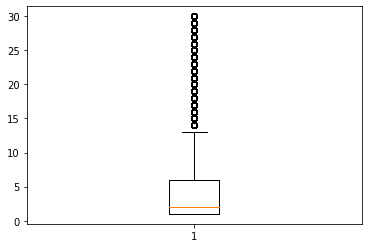

In [180]:
boxplot(unique_days_df,'unique_days')

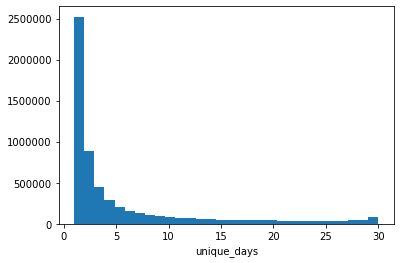

In [181]:
histogram_printing(unique_days_df,'unique_days',30)

In [182]:
unique_days_df['unique_days'].describe()

count   5,901,034.00
mean            5.40
std             7.31
min             1.00
25%             1.00
50%             2.00
75%             6.00
max            30.00
Name: unique_days, dtype: float64

In [183]:
np.percentile(unique_days_df['unique_days'], np.arange(0, 100, 10))

array([ 1.,  1.,  1.,  1.,  1.,  2.,  3.,  4.,  8., 17.])

In [184]:
unique_days_df = transforming_columns(unique_days_df,['unique_days','total_tvms'])

In [185]:
unique_days_df.columns

Index(['client_id', 'unique_days', 'log_transform_total_tvms', 'total_tvms',
       'log_transform_unique_days'],
      dtype='object')

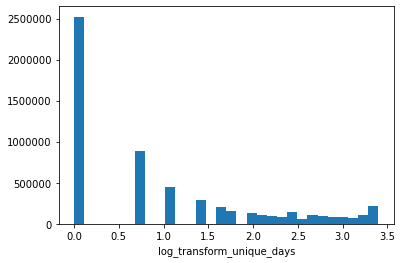

In [186]:
histogram_printing(unique_days_df,'log_transform_unique_days',30)

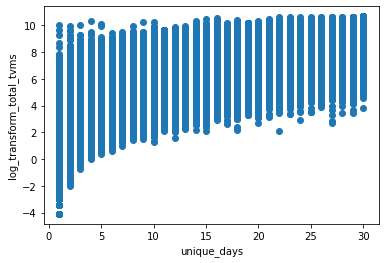

In [187]:
scatter_plot(unique_days_df,'unique_days','log_transform_total_tvms')

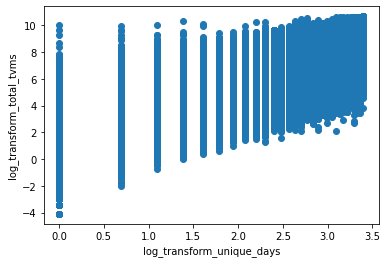

In [188]:
scatter_plot(unique_days_df,'log_transform_unique_days','log_transform_total_tvms')

In [189]:
scaled_data1 = scale_(unique_days_df[['log_transform_total_tvms','unique_days']])

In [ ]:
elbow_plot(min_cluster=2,max_cluster=8,scaled_data=scaled_data1)

In [ ]:
unique_days_df = clustering(unique_days_df,cluster_amounts = [3,4],scaled_data = scaled_data1)

In [ ]:
unique_days_df.columns

In [466]:
unique_days_df['kmeans_3_color'] = color_theme[unique_days_df['kmeans_3']]

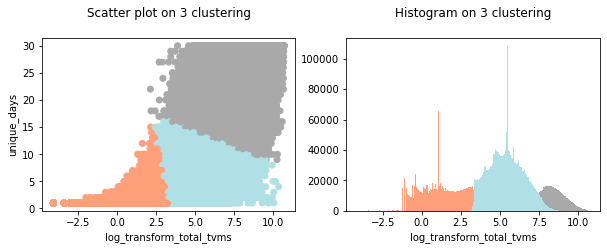

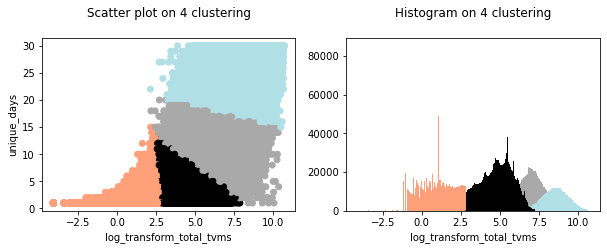

In [467]:
cluster_scatter(unique_days_df,'log_transform_total_tvms','unique_days',[3,4])

In [ ]:
#cluster_scatter(unique_days_df,'total_tvms','unique_days',[3,4])

In [468]:
description(unique_days_df,column = 'unique_days',cluster_value = 3)

unique_days


,count,mean,std,min,25%,50%,75%,max,User Percent
kmeans_3_color,,,,,,,,,
darkgray,"905,755.00",20.76,5.98,9.00,15.00,20.00,26.00,30.00,15.35
powderblue,"3,218,842.00",3.40,2.74,1.00,1.00,2.00,5.00,16.00,54.55
lightsalmon,"1,776,437.00",1.19,0.53,1.00,1.00,1.00,1.00,15.00,30.10


In [ ]:
desc_4_freq = unique_days_df.groupby('kmeans_4_color')['monthly_frequency'].describe()
desc_4_freq['index'] = desc_4_freq["mean"]/monthly_frequency_df['monthly_frequency'].mean()
desc_4_freq['user%'] = desc_4_freq['count']/desc_4_freq['count'].sum()
desc_4_freq.sort_values('user%')

In [178]:
unique_days_df.columns

NameError: name 'unique_days_df' is not defined

In [469]:
description(unique_days_df,column = 'total_tvms',cluster_value = 3)

total_tvms


,count,mean,std,min,25%,50%,75%,max,User Percent
kmeans_3_color,,,,,,,,,
darkgray,"905,755.00","5,556.36","5,690.01",8.32,"1,937.95","3,650.27","6,984.43","43,171.23",15.35
powderblue,"3,218,842.00",430.55,598.53,11.22,98.40,227.85,502.68,"30,838.17",54.55
lightsalmon,"1,776,437.00",6.17,7.14,0.02,1.02,2.98,8.93,28.35,30.10


In [470]:
description(unique_days_df,column = 'unique_days',cluster_value = 4)

unique_days


,count,mean,std,min,25%,50%,75%,max,User Percent
kmeans_4_color,,,,,,,,,
powderblue,"612,330.00",24.04,4.29,15.00,20.00,24.00,28.00,30.00,10.38
darkgray,"1,002,768.00",9.48,3.49,1.00,7.00,9.00,12.00,20.00,16.99
black,"2,708,536.00",2.13,1.33,1.00,1.00,2.00,3.00,13.00,45.90
lightsalmon,"1,577,400.00",1.17,0.49,1.00,1.00,1.00,1.00,15.00,26.73


In [471]:
description(unique_days_df,column = 'total_tvms',cluster_value = 4)

total_tvms


,count,mean,std,min,25%,50%,75%,max,User Percent
kmeans_4_color,,,,,,,,,
powderblue,"612,330.00","7,007.44","6,299.75",8.32,"2,747.45","5,082.14","9,046.36","43,171.23",10.38
darkgray,"1,002,768.00","1,573.68","1,400.61",8.65,694.70,"1,157.03","1,966.13","30,838.17",16.99
black,"2,708,536.00",204.58,196.97,12.10,62.70,142.03,268.68,"2,559.73",45.90
lightsalmon,"1,577,400.00",4.13,4.35,0.02,0.88,2.42,5.90,17.63,26.73


In [275]:
temp1 = description(unique_days_df,column = 'total_tvms',cluster_value = 3)
temp2 = description(unique_days_df,column = 'unique_days',cluster_value = 3)
temp3 = description(unique_days_df,column = 'total_tvms',cluster_value = 4)
temp4 = description(unique_days_df,column = 'unique_days',cluster_value = 4)

In [276]:
type(temp1)

pandas.core.frame.DataFrame

In [285]:
#export_clusters('test.csv', temp1,temp2,temp3,temp4)
export_clusters('test.csv', 'total_tvms_3', temp1)
export_clusters('test.csv', 'unique_days_3', temp2)
export_clusters('test.csv', 'total_tvms_4', temp3)
export_clusters('test.csv', 'unique_days_4', temp4)

In [ ]:
# NOTE:
# jitter attribute with the two columns in feature selection

In [338]:
april_df1.columns

Index(['client_id', 'month', 'most_Watched_Channel', 'most_watched_category',
       'total_tvms', 'user_status', 'LINEAR_TVMS', 'VOD_TVMS',
       'ADDTOWATCHLIST_FLAG', 'FAVORITECHANNEL_FLAG', 'SEARCHSTART_FLAG',
       'LIVEL2NAV_FLAG', 'VODL2NAV_FLAG', 'WATCHNOW_FLAG', 'BACKTOGUIDE_FLAG',
       'FEATURE_FLAG', 'tenure_days', 'avg_days_apart', 'avg_session_duration',
       'monthly_avg_session_duration', 'frequency', 'monthly_frequency',
       'unique_days', 'day_percent', 'log_transform_total_tvms'],
      dtype='object')

## VOD TVMs vs TVMs

In [207]:
VOD_TVMS_df = april_df1[['client_id','VOD_TVMS','log_transform_total_tvms','total_tvms']]

In [208]:
VOD_TVMS_df.head(1)

,client_id,VOD_TVMS,log_transform_total_tvms,total_tvms
0,942d292c-21ef-5e89-99fa-abd4b90b54aa,0.00,5.76,316.92


0  users are below the lower bound value of  0.0
1213929  users are above the upper bound value of  70.81667


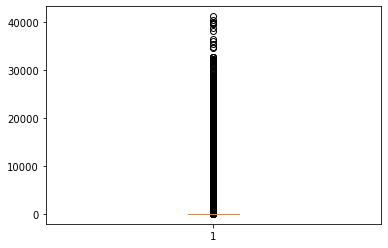

In [209]:
boxplot(VOD_TVMS_df,'VOD_TVMS')

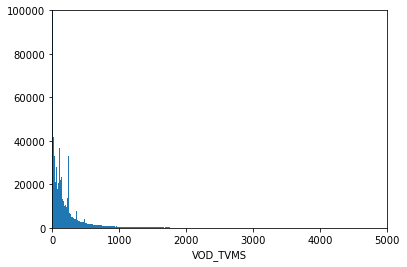

In [228]:
#histogram_printing(VOD_TVMS_df,'VOD_TVMS',1000)
histogram_printing(VOD_TVMS_df,column = 'VOD_TVMS',bins = 10000,ylim_list=[0,100000],xlim_list=[0,5000])

In [232]:
#histogram_printing(VOD_TVMS_df[VOD_TVMS_df['VOD_TVMS'] > 0],column = 'VOD_TVMS',bins = 10000)
#histogram_printing(VOD_TVMS_df[VOD_TVMS_df['VOD_TVMS'] > 0],column = 'VOD_TVMS',bins = 10000,ylim_list=[0,100000],xlim_list=[0,5000])

In [231]:
VOD_TVMS_df.describe()

,VOD_TVMS,log_transform_total_tvms,total_tvms
count,"5,901,034.00","5,901,034.00","5,901,034.00"
mean,100.07,4.54,"1,089.56"
std,483.02,2.73,"2,969.44"
min,0.00,-4.09,0.02
25%,0.00,2.59,13.32
50%,0.00,4.97,143.88
75%,28.33,6.50,664.32
max,"41,157.52",10.67,"43,171.23"


In [233]:
np.percentile(VOD_TVMS_df['VOD_TVMS'], np.arange(0, 100, 10))

array([  0.     ,   0.     ,   0.     ,   0.     ,   0.     ,   0.     ,
         0.     ,   3.25   ,  78.56667, 219.31667])

In [234]:
VOD_TVMS_df[VOD_TVMS_df['VOD_TVMS'] > 0].describe()

,VOD_TVMS,log_transform_total_tvms,total_tvms
count,"2,019,167.00","2,019,167.00","2,019,167.00"
mean,292.46,5.42,"1,583.72"
std,790.94,2.35,"3,673.36"
min,0.02,-4.09,0.02
25%,24.02,4.18,65.32
50%,107.32,5.49,242.48
75%,243.58,7.06,"1,165.87"
max,"41,157.52",10.66,"42,769.15"


In [235]:
np.percentile(VOD_TVMS_df[VOD_TVMS_df['VOD_TVMS'] > 0]['VOD_TVMS'], np.arange(0, 100, 10))

array([  0.01667,   2.33333,  12.61667,  36.86667,  71.4    , 107.31667,
       141.5    , 213.41667, 314.83333, 619.99001])

In [48]:
#VOD_TVMS_df = transforming_columns(VOD_TVMS_df,['VOD_TVMS'])

In [236]:
VOD_TVMS_df.head(1)

,client_id,VOD_TVMS,log_transform_total_tvms,total_tvms
0,942d292c-21ef-5e89-99fa-abd4b90b54aa,0.00,5.76,316.92


In [237]:
VOD_TVMS_df[VOD_TVMS_df['VOD_TVMS'] == 0]['client_id'].count()/len(VOD_TVMS_df) * 100 

65.78282721299352

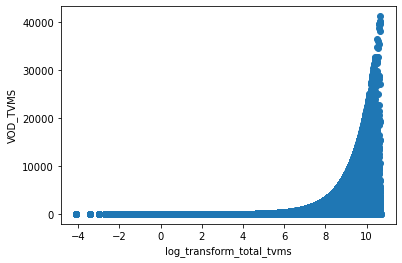

In [238]:
scatter_plot(VOD_TVMS_df,'log_transform_total_tvms','VOD_TVMS')

In [239]:
scaled_data1 = scale_(VOD_TVMS_df[['log_transform_total_tvms','VOD_TVMS']])

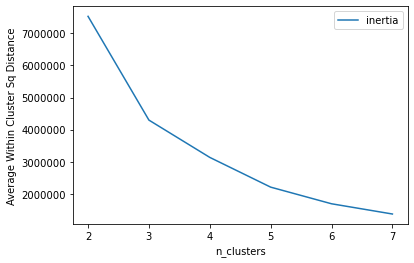

In [240]:
elbow_plot(min_cluster=2,max_cluster=8,scaled_data=scaled_data1)

In [241]:
VOD_TVMS_df = clustering(VOD_TVMS_df,cluster_amounts = [3,5],scaled_data = scaled_data1)

In [ ]:
VOD_TVMS_df['kmeans_5_color'] = color_theme[VOD_TVMS_df['kmeans_5']]

In [476]:
VOD_TVMS_df.head(2)
#unique_days_df['kmeans_3_color'] = color_theme[unique_days_df['kmeans_3']]

,client_id,VOD_TVMS,log_transform_total_tvms,total_tvms,kmeans_3,kmeans_5,kmeans_3_color,kmeans_5_color
0,942d292c-21ef-5e89-99fa-abd4b90b54aa,0.00,5.76,316.92,0,0,darkgray,darkgray
1,942d2c83-7615-5022-be70-73d0cb84c935,3.00,1.10,3.00,1,3,lightsalmon,black


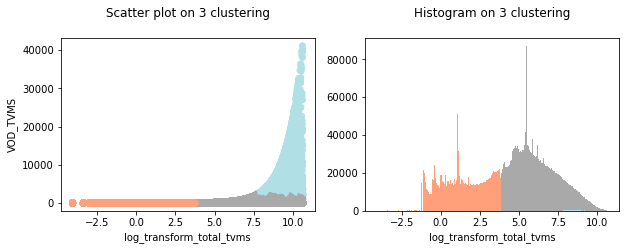

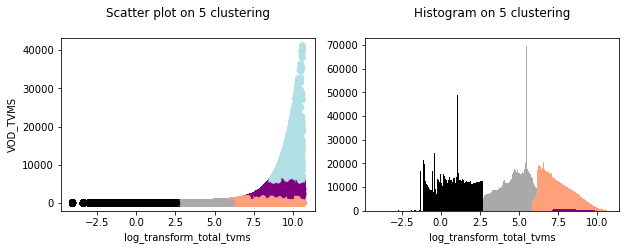

In [477]:
cluster_scatter(VOD_TVMS_df,'log_transform_total_tvms','VOD_TVMS',[3,5])

In [478]:
description(VOD_TVMS_df,column = 'VOD_TVMS',cluster_value = 3)

VOD_TVMS


,count,mean,std,min,25%,50%,75%,max,User Percent
kmeans_3_color,,,,,,,,,
powderblue,"37,424.00","4,595.73","3,033.50","2,308.20","2,816.00","3,576.21","5,147.86","41,157.52",0.63
darkgray,"3,819,515.00",108.33,258.96,0.00,0.00,0.00,110.13,"2,348.17",64.73
lightsalmon,"2,044,095.00",2.32,7.17,0.00,0.00,0.00,0.00,44.57,34.64


In [479]:
description(VOD_TVMS_df,column = 'total_tvms',cluster_value = 3)

total_tvms


,count,mean,std,min,25%,50%,75%,max,User Percent
kmeans_3_color,,,,,,,,,
powderblue,"37,424.00","8,542.58","6,815.44","2,348.72","3,805.62","6,047.61","10,780.86","42,769.15",0.63
darkgray,"3,819,515.00","1,594.26","3,427.11",44.58,151.57,373.67,"1,343.03","43,171.23",64.73
lightsalmon,"2,044,095.00",10.05,12.17,0.02,1.20,3.82,15.52,46.00,34.64


In [480]:
description(VOD_TVMS_df,column = 'VOD_TVMS',cluster_value = 5)

VOD_TVMS


,count,mean,std,min,25%,50%,75%,max,User Percent
kmeans_5_color,,,,,,,,,
powderblue,"7,698.00","9,059.85","4,084.03","5,657.20","6,456.16","7,654.14","10,039.92","41,157.52",0.13
purple,"85,673.00","2,261.92","1,034.33","1,167.63","1,465.18","1,899.33","2,752.23","5,658.78",1.45
lightsalmon,"1,709,317.00",134.71,240.86,0.00,0.00,0.00,181.58,"1,207.23",28.97
darkgray,"2,568,365.00",37.26,68.08,0.00,0.00,0.00,50.07,333.80,43.52
black,"1,529,981.00",0.68,2.19,0.00,0.00,0.00,0.00,15.33,25.93


In [481]:
description(VOD_TVMS_df,column = 'total_tvms',cluster_value = 5)

total_tvms


,count,mean,std,min,25%,50%,75%,max,User Percent
kmeans_5_color,,,,,,,,,
powderblue,"7,698.00","13,208.25","7,215.52","5,675.98","7,855.34","10,804.82","16,322.38","42,193.42",0.13
purple,"85,673.00","5,805.54","5,917.53","1,207.42","2,087.97","3,567.22","6,924.48","42,769.15",1.45
lightsalmon,"1,709,317.00","3,172.82","4,466.58",333.82,757.07,"1,458.62","3,566.80","43,171.23",28.97
darkgray,"2,568,365.00",156.28,117.61,15.35,55.92,125.18,238.83,485.85,43.52
black,"1,529,981.00",3.75,3.83,0.02,0.85,2.28,5.35,15.40,25.93


## Feature Clustering function

In [ ]:
# the features are essentially all the same when it comes to the output
    # 1. histogram to get an idea of where the users are landing
    # 2. np.arange() to see what percentage of users are falling where
    # 3. what perfentage of users used the feature
    # 4. scale the data
    # 5. elbow plot on the scaled data
    # 6. clustering based on the elbow plot output
    # 7. scatter plot output on the clustering done
    # 8. print description details on the different cluster numbers

In [409]:
def feature_func(column_flag):
    temporary_df = april_df1[['client_id',column_flag,'log_transform_total_tvms','total_tvms']]
    print('\nhistogram next\n')
    histogram_printing(temporary_df,column = column_flag,bins = 10)
    print('These are the percentiles broken down by 5% markers\n',np.percentile(temporary_df[column_flag], np.arange(0, 100, 5)))
    print('\nLess than ',temporary_df[temporary_df[column_flag] == 1]['client_id'].count() / len(temporary_df)* 100,'% of users use this feature')
    print('\nscaling next\n')
    scaled_data1 = scale_(temporary_df[['log_transform_total_tvms',column_flag]])
    print('\nelbow plot next\n')
    elbow_plot(min_cluster=2,max_cluster=8,scaled_data=scaled_data1)
    print('\nuser input on how many clusters next\n')
    #resp1 = input('')
    temp_resp = list(map(int, input("how many clusters do you want(Space-Separated): ").strip().split()))
    print('\nclustering actual next\n')
    temporary_df = clustering(temporary_df,cluster_amounts = temp_resp,scaled_data = scaled_data1)
    print('\ncluster scatter next\n')
    #cluster_scatter(temporary_df,'log_transform_total_tvms',column_flag,temp_resp)
    print('\ndescription next next\n')
    for i in temp_resp:
        print(i,' description happening now')
        cluster_scatter(temporary_df,'log_transform_total_tvms',column_flag,[i])
        print(description(temporary_df,column = 'total_tvms',cluster_value = i))

## AddtoWatchlist Clustering

In [376]:
ADDTOWATCHLIST_FLAG_df = april_df1[['client_id','ADDTOWATCHLIST_FLAG','log_transform_total_tvms','total_tvms']]

In [377]:
ADDTOWATCHLIST_FLAG_df.head(2)

,client_id,ADDTOWATCHLIST_FLAG,log_transform_total_tvms,total_tvms
0,942d292c-21ef-5e89-99fa-abd4b90b54aa,0.00,5.76,316.92
1,942d2c83-7615-5022-be70-73d0cb84c935,0.00,1.10,3.00


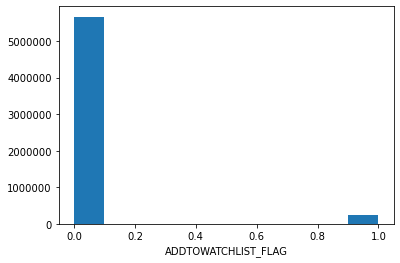

In [378]:
histogram_printing(ADDTOWATCHLIST_FLAG_df,column = 'ADDTOWATCHLIST_FLAG',bins = 10)

In [379]:
np.percentile(ADDTOWATCHLIST_FLAG_df['ADDTOWATCHLIST_FLAG'], np.arange(0, 100, 1))

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.])

In [380]:
# less than 4% of users use the add to watchlist feature

In [381]:
# how many users us the addtowatchlist feature
ADDTOWATCHLIST_FLAG_df[ADDTOWATCHLIST_FLAG_df['ADDTOWATCHLIST_FLAG'] == 1]['client_id'].count() / len(ADDTOWATCHLIST_FLAG_df)* 100

3.999960007008941

In [382]:
# not really a point in a scatter plot since we arent going to see much except for two lines at 0 and 1
#scatter_plot(ADDTOWATCHLIST_FLAG_df,'log_transform_total_tvms','ADDTOWATCHLIST_FLAG')

In [383]:
scaled_data1 = scale_(ADDTOWATCHLIST_FLAG_df[['log_transform_total_tvms','ADDTOWATCHLIST_FLAG']])

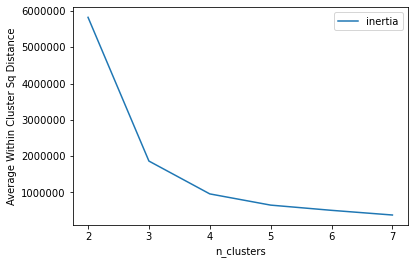

In [289]:
elbow_plot(min_cluster=2,max_cluster=8,scaled_data=scaled_data1)

In [384]:
ADDTOWATCHLIST_FLAG_df = clustering(ADDTOWATCHLIST_FLAG_df,cluster_amounts = [3,4],scaled_data = scaled_data1)

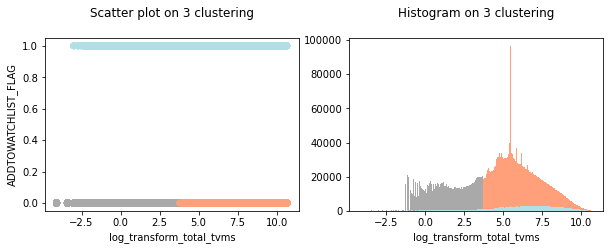

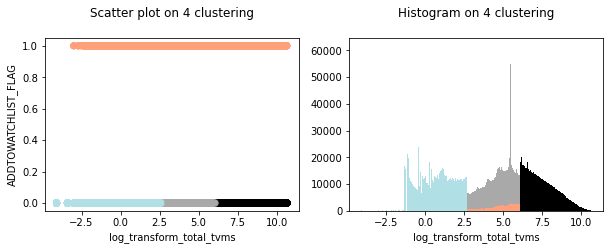

In [385]:
cluster_scatter(ADDTOWATCHLIST_FLAG_df,'log_transform_total_tvms','ADDTOWATCHLIST_FLAG',[3,4])

In [386]:
description(ADDTOWATCHLIST_FLAG_df,column = 'total_tvms',cluster_value = 3)

,count,mean,std,min,25%,50%,75%,max,User Percent
kmeans_3_color,,,,,,,,,
powderblue,"236,039.00","2,610.61","4,815.83",0.05,117.12,623.45,"2,736.68","42,649.50",4.00
lightsalmon,"3,703,786.00","1,564.65","3,402.85",42.20,144.17,357.75,"1,295.42","43,171.23",62.77
darkgray,"1,961,209.00",9.28,11.22,0.02,1.15,3.57,14.15,42.18,33.24


In [387]:
description(ADDTOWATCHLIST_FLAG_df,column = 'total_tvms',cluster_value = 4)

,count,mean,std,min,25%,50%,75%,max,User Percent
kmeans_4_color,,,,,,,,,
black,"1,660,706.00","3,263.10","4,536.63",450.38,778.97,"1,532.97","3,689.33","43,171.23",28.14
lightsalmon,"236,039.00","2,610.61","4,815.83",0.05,117.12,623.45,"2,736.68","42,649.50",4.00
darkgray,"2,506,496.00",155.10,115.10,15.23,55.60,124.90,239.08,450.37,42.48
powderblue,"1,497,793.00",3.69,3.77,0.02,0.85,2.25,5.25,15.22,25.38


In [297]:
# make a note of how rare the feature usage is
# slow adoption

## Search vs TVMs

In [388]:
SEARCHSTART_FLAG_df = april_df1[['client_id','SEARCHSTART_FLAG','log_transform_total_tvms','total_tvms']]

In [397]:
SEARCHSTART_FLAG_df.head(2)

,client_id,SEARCHSTART_FLAG,log_transform_total_tvms,total_tvms,kmeans_3,kmeans_3_color,kmeans_5,kmeans_5_color
0,942d292c-21ef-5e89-99fa-abd4b90b54aa,0.00,5.76,316.92,2,powderblue,1,lightsalmon
1,942d2c83-7615-5022-be70-73d0cb84c935,0.00,1.10,3.00,0,darkgray,0,darkgray


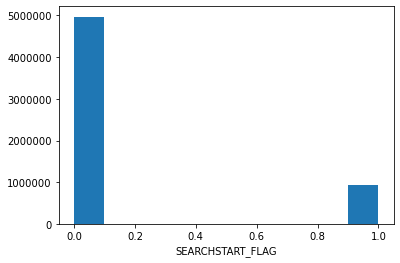

In [390]:
histogram_printing(SEARCHSTART_FLAG_df,column = 'SEARCHSTART_FLAG',bins = 10)

In [391]:
np.percentile(SEARCHSTART_FLAG_df['SEARCHSTART_FLAG'], np.arange(0, 100, 5))

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 1., 1.])

In [392]:
# less than 16% of users use the add to watchlist feature

In [393]:
# how many users us the addtowatchlist feature
SEARCHSTART_FLAG_df[SEARCHSTART_FLAG_df['SEARCHSTART_FLAG'] == 1]['client_id'].count() / len(SEARCHSTART_FLAG_df)* 100

15.807331393108395

In [394]:
# not really a point in a scatter plot since we arent going to see much except for two lines at 0 and 1
#scatter_plot(SEARCHSTART_FLAG_df,'log_transform_total_tvms','SEARCHSTART_FLAG')

In [395]:
scaled_data1 = scale_(SEARCHSTART_FLAG_df[['log_transform_total_tvms','SEARCHSTART_FLAG']])

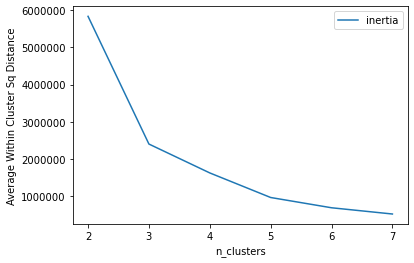

In [308]:
elbow_plot(min_cluster=2,max_cluster=8,scaled_data=scaled_data1)

In [396]:
SEARCHSTART_FLAG_df = clustering(SEARCHSTART_FLAG_df,cluster_amounts = [3,5],scaled_data = scaled_data1)

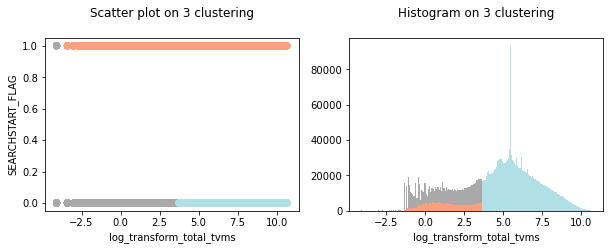

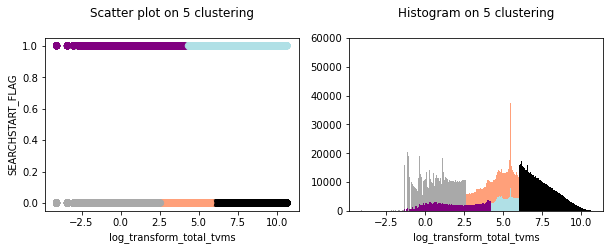

In [398]:
cluster_scatter(SEARCHSTART_FLAG_df,'log_transform_total_tvms','SEARCHSTART_FLAG',[3,5])

In [399]:
description(SEARCHSTART_FLAG_df,column = 'total_tvms',cluster_value = 3)

,count,mean,std,min,25%,50%,75%,max,User Percent
kmeans_3_color,,,,,,,,,
lightsalmon,"932,763.00","1,740.88","3,840.15",0.03,31.75,261.38,"1,461.60","42,761.38",15.81
powderblue,"3,247,451.00","1,475.16","3,301.14",39.65,137.45,334.17,"1,183.46","43,171.23",55.03
darkgray,"1,720,820.00",8.83,10.58,0.02,1.10,3.43,13.52,39.63,29.16


In [400]:
description(SEARCHSTART_FLAG_df,column = 'total_tvms',cluster_value = 5)

,count,mean,std,min,25%,50%,75%,max,User Percent
kmeans_5_color,,,,,,,,,
black,"1,463,377.00","3,062.86","4,425.22",411.87,710.77,"1,390.25","3,386.45","43,171.23",24.80
powderblue,"644,018.00","2,514.59","4,407.33",69.60,240.45,735.47,"2,676.58","42,761.38",10.91
lightsalmon,"2,196,857.00",145.21,106.90,14.27,51.90,117.92,229.52,411.85,37.23
purple,"288,778.00",15.20,19.00,0.02,1.65,5.20,23.72,69.58,4.89
darkgray,"1,308,004.00",3.51,3.55,0.02,0.78,2.17,5.00,14.25,22.17


## Multiple features


histogram next



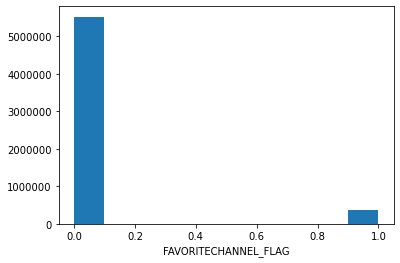

These are the percentiles broken down by 5% markers
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]

Less than  6.411401798396687 % of users use this feature

scaling next


elbow plot next



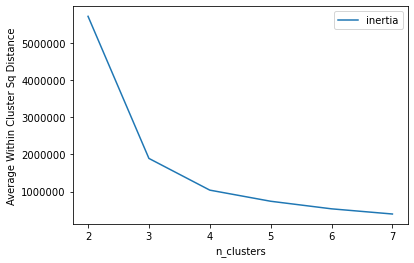


user input on how many clusters next

how many clusters do you want(Space-Separated): 3 4

clustering actual next


cluster scatter next


description next next

3  description happening now
                      count     mean      std   min    25%    50%      75%  \
kmeans_3_color                                                               
lightsalmon      378,339.00 3,170.91 5,260.97  0.02 173.20 959.15 3,758.21   
darkgray       3,610,783.00 1,443.80 3,211.27 39.43 136.65 333.40 1,170.70   
powderblue     1,911,912.00     8.68    10.45  0.02   1.12   3.38    13.10   

                     max  User Percent  
kmeans_3_color                          
lightsalmon    42,761.38          6.41  
darkgray       43,171.23         61.19  
powderblue         39.42         32.40  
4  description happening now
                      count     mean      std    min    25%      50%      75%  \
kmeans_4_color                                                                  
lightsalmon      378,

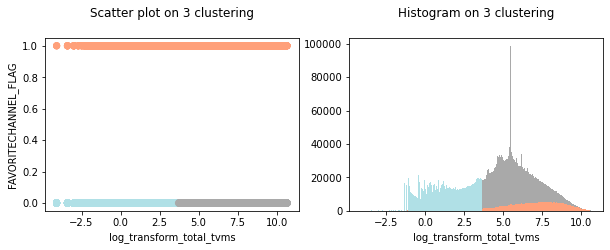

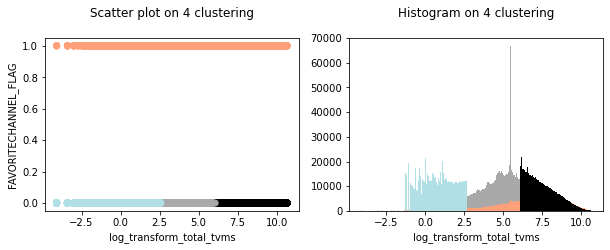

In [401]:
# FAVORITECHANNEL
feature_func(column_flag= 'FAVORITECHANNEL_FLAG')


histogram next



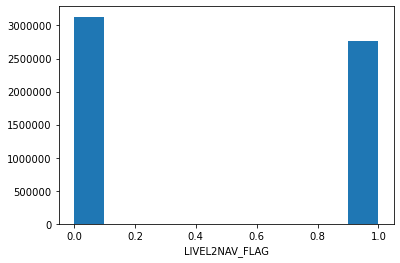

These are the percentiles broken down by 5% markers
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]

Less than  46.940146421796584 % of users use this feature

scaling next


elbow plot next



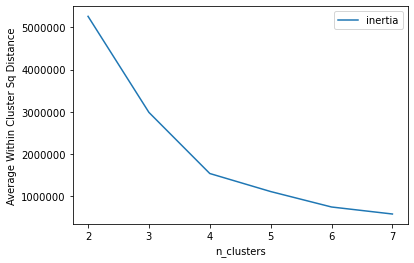


user input on how many clusters next

how many clusters do you want(Space-Separated): 3 4

clustering actual next


cluster scatter next


description next next

3  description happening now
                      count     mean      std   min    25%    50%      75%  \
kmeans_3_color                                                               
lightsalmon    2,486,100.00 1,941.75 3,866.94  4.90 116.38 466.87 1,865.22   
darkgray       2,006,329.00   796.10 2,364.59 18.07  77.87 194.88   482.45   
powderblue     1,408,605.00     3.49     4.01  0.02   0.78   1.97     4.17   

                     max  User Percent  
kmeans_3_color                          
lightsalmon    42,940.43         42.13  
darkgray       43,171.23         34.00  
powderblue         18.05         23.87  
4  description happening now
                      count     mean      std    min    25%    50%      75%  \
kmeans_4_color                                                                
lightsalmon    1,896,438.

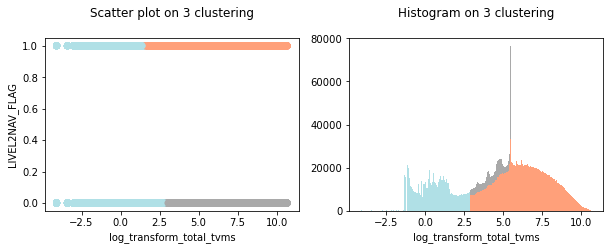

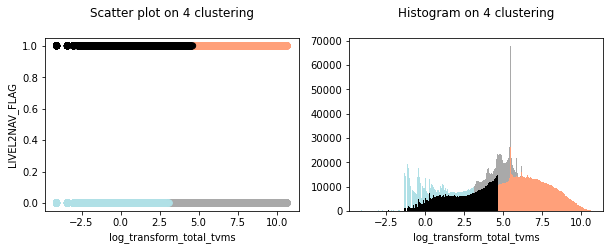

In [402]:
# LIVEL2NAV
feature_func(column_flag= 'LIVEL2NAV_FLAG')


histogram next



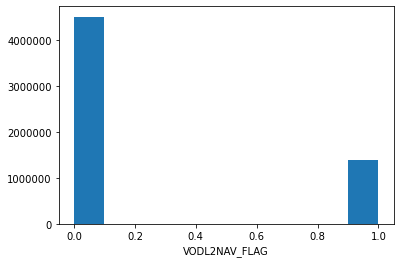

These are the percentiles broken down by 5% markers
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1.]

Less than  23.481681346014952 % of users use this feature

scaling next


elbow plot next



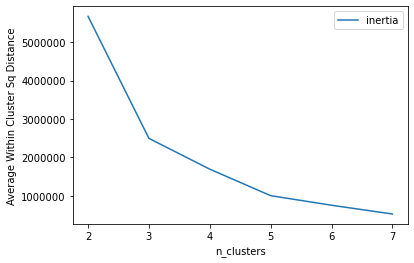


user input on how many clusters next

how many clusters do you want(Space-Separated): 3 5

clustering actual next


cluster scatter next


description next next

3  description happening now
total_tvms
                      count     mean      std   min    25%    50%      75%  \
kmeans_3_color                                                               
powderblue     1,385,138.00 1,803.14 3,825.86  0.25  60.50 340.82 1,593.53   
lightsalmon    2,901,454.00 1,350.91 3,159.58 35.20 122.83 291.40 1,029.17   
darkgray       1,614,442.00     7.63     9.28  0.02   1.00   3.00    11.30   

                     max  User Percent  
kmeans_3_color                          
powderblue     42,428.53         23.47  
lightsalmon    43,171.23         49.17  
darkgray           35.18         27.36  
5  description happening now
total_tvms
                      count     mean      std    min    25%      50%      75%  \
kmeans_5_color                                                                  

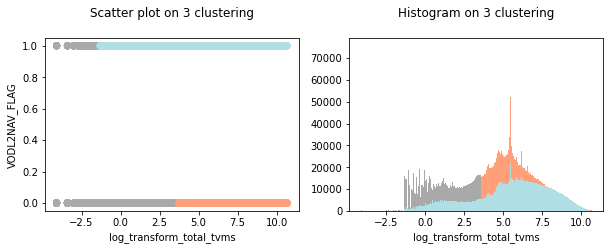

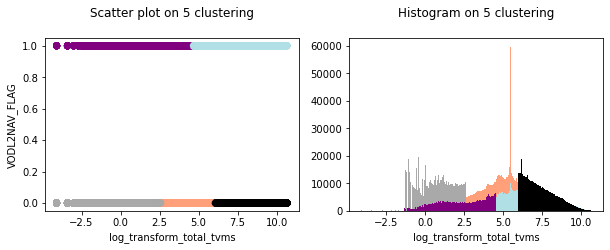

In [482]:
# VODL2NAV
feature_func(column_flag= 'VODL2NAV_FLAG')


histogram next



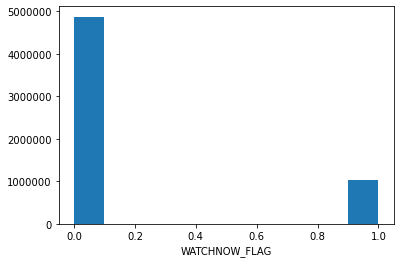

These are the percentiles broken down by 5% markers
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1.]

Less than  17.495323700897163 % of users use this feature

scaling next


elbow plot next



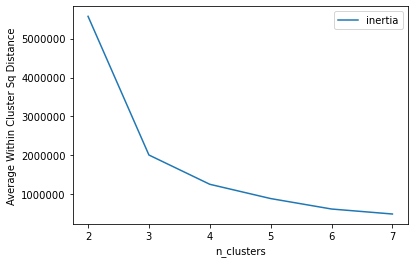


user input on how many clusters next

how many clusters do you want(Space-Separated): 3 4

clustering actual next


cluster scatter next


description next next

3  description happening now
total_tvms
                      count     mean      std   min    25%    50%      75%  \
kmeans_3_color                                                               
darkgray       1,032,351.00 1,874.27 3,896.51  0.17 115.03 391.67 1,645.84   
lightsalmon    3,060,321.00 1,464.02 3,292.63 37.30 131.05 322.17 1,173.32   
powderblue     1,808,362.00     7.88     9.67  0.02   1.05   3.05    11.42   

                     max  User Percent  
kmeans_3_color                          
darkgray       42,769.15         17.49  
lightsalmon    43,171.23         51.86  
powderblue         37.28         30.64  
4  description happening now
total_tvms
                      count     mean      std    min    25%      50%      75%  \
kmeans_4_color                                                                  

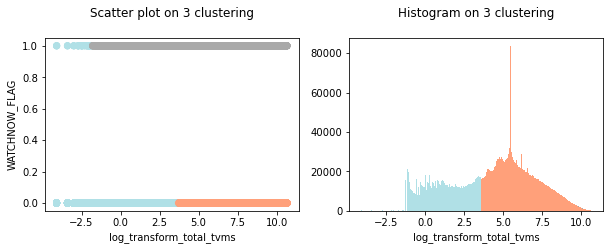

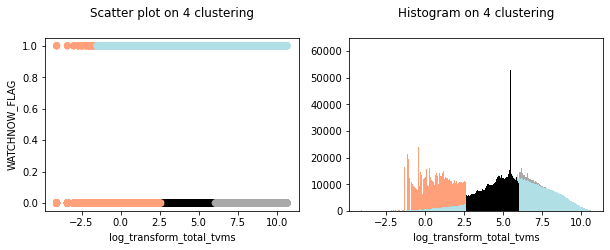

In [483]:
# WATCHNOW
feature_func(column_flag= 'WATCHNOW_FLAG')


histogram next



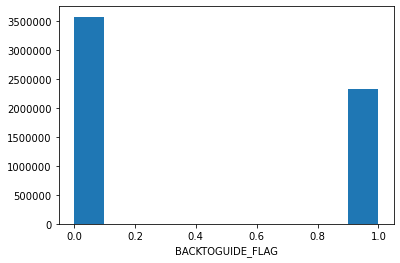

These are the percentiles broken down by 5% markers
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1.]

Less than  39.5019923626944 % of users use this feature

scaling next


elbow plot next



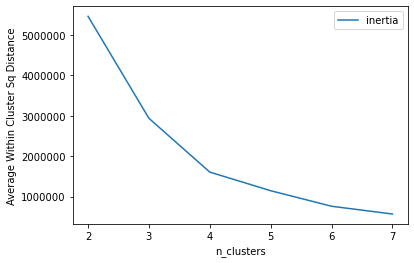


user input on how many clusters next

how many clusters do you want(Space-Separated): 3 4

clustering actual next


cluster scatter next


description next next

3  description happening now
total_tvms
                      count     mean      std   min    25%    50%      75%  \
kmeans_3_color                                                               
lightsalmon    2,099,851.00 2,017.92 4,016.59  3.72 110.65 464.07 1,931.17   
darkgray       2,335,806.00   935.87 2,497.11 21.75  91.28 227.92   631.90   
powderblue     1,465,377.00     4.22     5.11  0.02   0.82   2.10     5.22   

                     max  User Percent  
kmeans_3_color                          
lightsalmon    42,940.43         35.58  
darkgray       43,171.23         39.58  
powderblue         21.73         24.83  
4  description happening now
total_tvms
                      count     mean      std   min    25%    50%      75%  \
kmeans_4_color                                                               
light

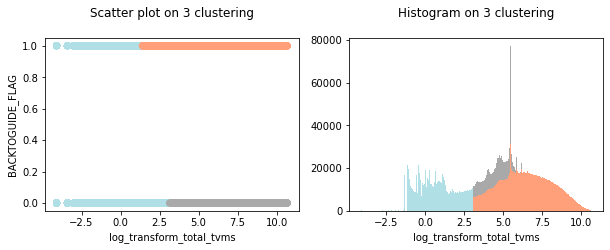

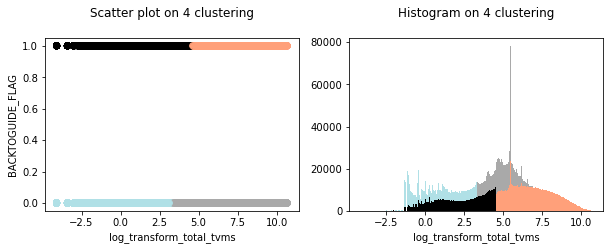

In [484]:
# BACKTOGUIDE
feature_func(column_flag= 'BACKTOGUIDE_FLAG')


histogram next



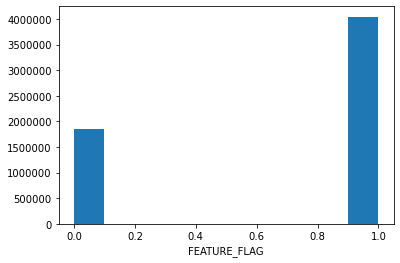

These are the percentiles broken down by 5% markers
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]

Less than  68.47262700062396 % of users use this feature

scaling next


elbow plot next



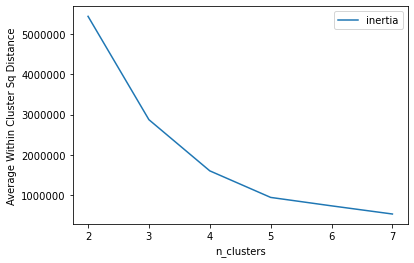


user input on how many clusters next

how many clusters do you want(Space-Separated): 3 4

clustering actual next


cluster scatter next


description next next

3  description happening now
total_tvms
                      count     mean      std   min    25%    50%      75%  \
kmeans_3_color                                                               
lightsalmon    2,739,808.00 2,077.43 3,945.49 68.65 226.75 585.95 2,011.90   
darkgray       1,859,615.00   384.89 1,518.40  0.02   3.00  49.63   225.72   
powderblue     1,301,611.00    16.92    19.40  0.02   1.88   7.17    28.13   

                     max  User Percent  
kmeans_3_color                          
lightsalmon    43,171.23         46.43  
darkgray       35,034.58         31.51  
powderblue         68.63         22.06  
4  description happening now
total_tvms
                      count     mean      std   min    25%    50%      75%  \
kmeans_4_color                                                               
light

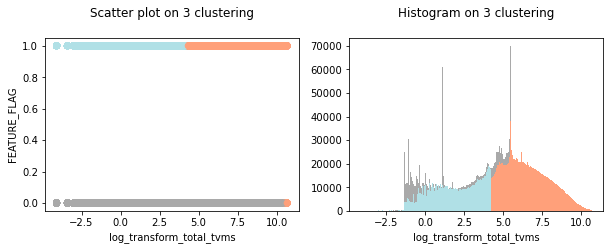

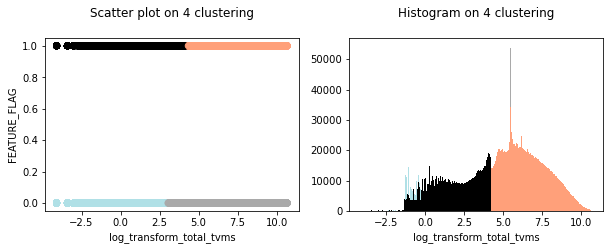

In [451]:
# FEATURE
feature_func(column_flag= 'FEATURE_FLAG')

## ASD vs TVMs 

In [421]:
avg_session_duration_df = april_df1[['client_id','monthly_avg_session_duration','log_transform_total_tvms','total_tvms']]

In [422]:
avg_session_duration_df.head(2)

,client_id,monthly_avg_session_duration,log_transform_total_tvms,total_tvms
0,942d292c-21ef-5e89-99fa-abd4b90b54aa,21.13,5.76,316.92
1,942d2c83-7615-5022-be70-73d0cb84c935,3.00,1.10,3.00


0  users are below the lower bound value of  0.02
181916  users are above the upper bound value of  322.34


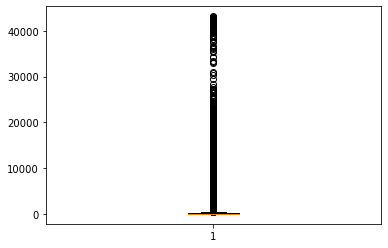

In [423]:
boxplot(avg_session_duration_df,'monthly_avg_session_duration')

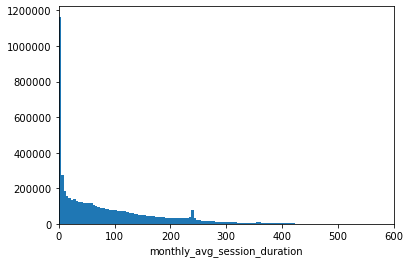

In [429]:
histogram_printing(avg_session_duration_df,column = 'monthly_avg_session_duration',bins = 10000,ylim_list=[0,0],xlim_list=[0,600])
#(df,column,bins,ylim_list=[0,0],xlim_list=[0,0])

In [426]:
avg_session_duration_df['monthly_avg_session_duration'].describe()
#avg_session_duration_df['avg_session_duration'].max()
#april_df1.columns

count   5,901,034.00
mean           94.96
std           276.18
min             0.02
25%             9.42
50%            56.96
75%           134.59
max        43,171.23
Name: monthly_avg_session_duration, dtype: float64

In [430]:
np.percentile(avg_session_duration_df['monthly_avg_session_duration'], np.arange(0, 100, 5))

array([  0.02,   0.63,   1.32,   2.57,   4.53,   9.42,  17.05,  26.11,
        35.57,  46.08,  56.96,  68.89,  82.71,  98.24, 115.35, 134.59,
       159.48, 190.97, 230.7 , 276.46])

In [433]:
avg_session_duration_df = transforming_columns(avg_session_duration_df,['monthly_avg_session_duration'])

In [434]:
avg_session_duration_df.head(2)

,client_id,monthly_avg_session_duration,log_transform_total_tvms,total_tvms,log_transform_monthly_avg_session_duration
0,942d292c-21ef-5e89-99fa-abd4b90b54aa,21.13,5.76,316.92,3.05
1,942d2c83-7615-5022-be70-73d0cb84c935,3.00,1.10,3.00,1.10


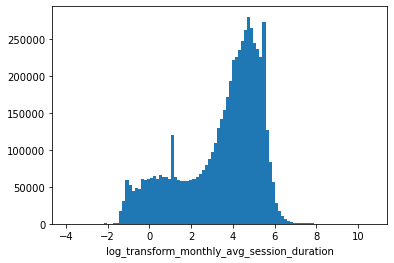

In [435]:
histogram_printing(avg_session_duration_df,'log_transform_monthly_avg_session_duration',100)

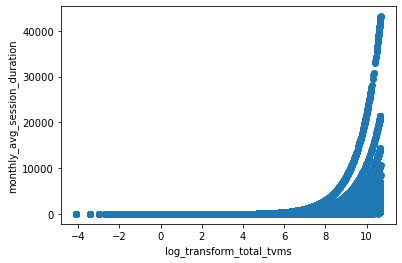

In [436]:
scatter_plot(avg_session_duration_df,'log_transform_total_tvms','monthly_avg_session_duration')

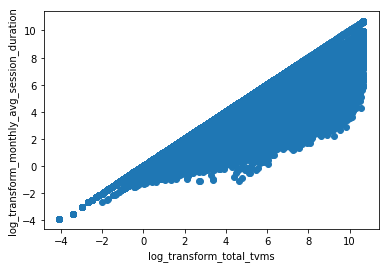

In [437]:
scatter_plot(avg_session_duration_df,'log_transform_total_tvms','log_transform_monthly_avg_session_duration')

In [438]:
scaled_data1 = scale_(avg_session_duration_df[['log_transform_total_tvms','log_transform_monthly_avg_session_duration']])

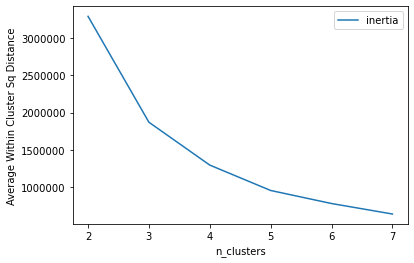

In [439]:
elbow_plot(2,8,scaled_data1)

In [440]:
avg_session_duration_df = clustering(avg_session_duration_df,cluster_amounts = [3,4],scaled_data = scaled_data1)

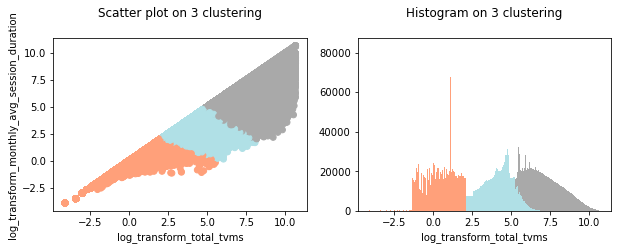

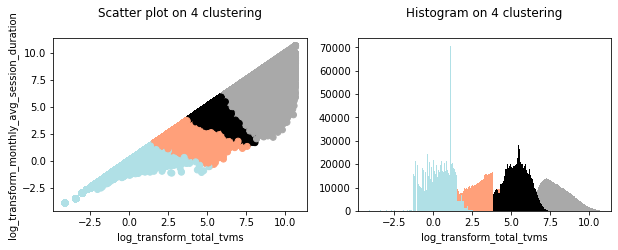

In [441]:
cluster_scatter(avg_session_duration_df,'log_transform_total_tvms','log_transform_monthly_avg_session_duration',[3,4])

In [442]:
description(avg_session_duration_df,column = 'total_tvms',cluster_value = 3)

,count,mean,std,min,25%,50%,75%,max,User Percent
kmeans_3_color,,,,,,,,,
darkgray,"2,618,612.00","2,382.66","4,105.42",128.83,348.77,828.72,"2,453.22","43,171.23",44.38
powderblue,"1,918,873.00",97.13,99.06,8.20,31.20,69.30,123.67,"3,212.73",32.52
lightsalmon,"1,363,549.00",2.85,3.14,0.02,0.75,1.85,3.82,254.17,23.11


In [446]:
description(avg_session_duration_df,column = 'monthly_avg_session_duration',cluster_value = 3)

,count,mean,std,min,25%,50%,75%,max,User Percent
kmeans_3_color,,,,,,,,,
darkgray,"2,618,612.00",181.61,396.57,7.15,96.33,147.74,221.62,"43,171.23",44.38
powderblue,"1,918,873.00",42.61,29.11,1.18,19.24,35.35,58.73,128.82,32.52
lightsalmon,"1,363,549.00",2.24,1.89,0.02,0.70,1.62,3.12,8.18,23.11


In [443]:
description(avg_session_duration_df,column = 'total_tvms',cluster_value = 4)

,count,mean,std,min,25%,50%,75%,max,User Percent
kmeans_4_color,,,,,,,,,
darkgray,"1,389,479.00","4,142.39","5,012.29",393.33,"1,226.23","2,268.20","4,911.38","43,171.23",23.55
black,"2,247,826.00",282.33,217.00,45.93,123.23,226.48,371.30,"3,212.73",38.09
lightsalmon,"1,116,821.00",33.09,36.56,4.60,11.60,23.63,40.93,"1,938.57",18.93
powderblue,"1,146,908.00",1.90,1.66,0.02,0.67,1.40,2.92,168.60,19.44


In [445]:
description(avg_session_duration_df,column = 'monthly_avg_session_duration',cluster_value = 4)

,count,mean,std,min,25%,50%,75%,max,User Percent
kmeans_4_color,,,,,,,,,
darkgray,"1,389,479.00",216.55,537.47,7.15,111.89,169.43,241.03,"43,171.23",23.55
black,"2,247,826.00",105.87,70.25,4.97,54.02,84.10,136.23,393.32,38.09
lightsalmon,"1,116,821.00",17.63,10.74,0.60,8.38,15.35,25.05,45.92,18.93
powderblue,"1,146,908.00",1.59,1.13,0.02,0.63,1.27,2.43,4.58,19.44


## Return Users

In [92]:
return_users_df = april_df.loc[april_df['user_status'] == 'Return User']

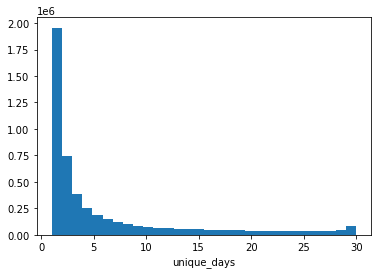

In [93]:
histogram_printing(return_users_df,'unique_days',30)

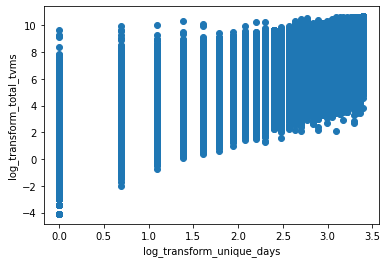

In [95]:
scatter_plot(return_users_df,'log_transform_unique_days','log_transform_total_tvms')

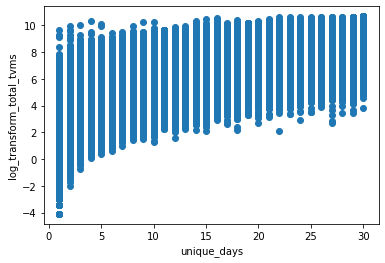

In [96]:
scatter_plot(return_users_df,'unique_days','log_transform_total_tvms')

In [59]:
ret_scaled_data1 = scale_(return_users_df[['log_transform_total_tvms','log_transform_unique_days']])
ret_scaled_data2 = scale_(return_users_df[['log_transform_total_tvms','unique_days']])

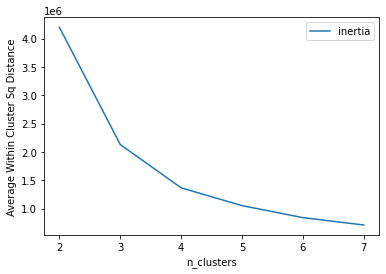

In [57]:
elbow_plot(min_cluster=2,max_cluster=8,scaled_data=scaled_data1)

In [ ]:
elbow_plot(min_cluster=2,max_cluster=8,scaled_data=scaled_data2)

In [60]:
cluster_amounts = [3,4]
return_users_df = clustering(return_users_df,cluster_amounts,scaled_data1)

Scatter plot on 3 clustering



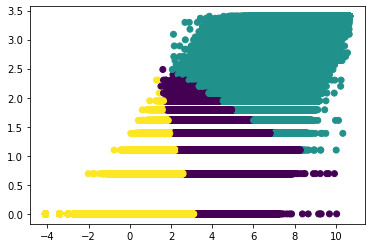

Scatter plot on 4 clustering



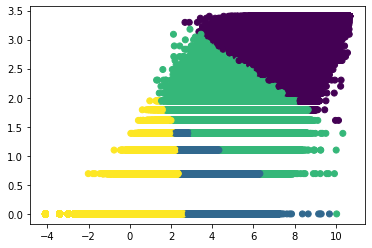

In [62]:
cluster_scatter(return_users_df,'log_transform_total_tvms','log_transform_unique_days',[3])
cluster_scatter(return_users_df,'log_transform_total_tvms','log_transform_unique_days',[4])

In [69]:
#new_april_df.columns
kmeans_4_describe = return_users_df.groupby('kmeans_4')['total_tvms'].describe()
kmeans_3_describe = return_users_df.groupby('kmeans_3')['total_tvms'].describe()

In [75]:
kmeans_4_describe

,count,mean,std,min,25%,50%,75%,max
kmeans_4,,,,,,,,
0,1084827.0,4946.513346,5397.314727,14.53334,1639.37500,3055.96669,6091.57502,43171.23413
1,2011649.0,133.761635,121.914046,8.75000,41.08333,94.76667,200.63333,16088.65000
2,1340231.0,589.045532,518.750730,3.66667,230.16667,448.61667,780.25001,30838.16667
3,1470896.0,3.303391,3.269450,0.01667,0.81667,2.08333,4.66667,13.91667


In [78]:
kmeans_4_describe['User Percent'] = kmeans_4_describe['count']/sum(kmeans_4_describe['count'])*100
kmeans_3_describe['User Percent'] = kmeans_3_describe['count']/sum(kmeans_3_describe['count'])*100

In [79]:
kmeans_4_describe

,count,mean,std,min,25%,50%,75%,max,User Percent
kmeans_4,,,,,,,,,
0,1084827.0,4946.513346,5397.314727,14.53334,1639.37500,3055.96669,6091.57502,43171.23413,18.363235
1,2011649.0,133.761635,121.914046,8.75000,41.08333,94.76667,200.63333,16088.65000,34.051865
2,1340231.0,589.045532,518.750730,3.66667,230.16667,448.61667,780.25001,30838.16667,22.686545
3,1470896.0,3.303391,3.269450,0.01667,0.81667,2.08333,4.66667,13.91667,24.898356


In [80]:
kmeans_3_describe

,count,mean,std,min,25%,50%,75%,max,User Percent
kmeans_3,,,,,,,,,
0,2597935.0,210.403431,218.251216,4.53333,64.73333,142.06667,267.01667,22828.03333,43.976127
1,1678293.0,3500.698823,4772.814184,7.86667,817.90000,1730.88333,4091.13335,43171.23413,28.409035
2,1631375.0,4.717464,5.374128,0.01667,0.91667,2.56667,6.45000,23.08334,27.614838
